In [195]:
import numpy as np
import pandas as pd

## Features half hour analysis

In [196]:
df_weather_hourly = pd.read_parquet(r'..\data\01_interim\weather_hourly_darksky_cleaned.parquet')

In [197]:
df_consumption_hourly = pd.read_parquet(r'..\data\02_processed\parquet\group_4_half_hourly.parquet')

In [198]:
df_consumption_hourly = df_consumption_hourly.drop(columns=['Date','Acorn_grouped'])

In [199]:
df = pd.merge(df_weather_hourly, df_consumption_hourly, left_index=True, right_on='DateTime').reset_index(drop=True)
df = df.drop(columns='apparentTemperature')

In [200]:
holidays = pd.read_csv(r'..\data\00_raw\uk_bank_holidays.csv')
holidays = pd.to_datetime(holidays['Bank holidays'])
df['is_holiday'] = df['DateTime'].dt.date.isin(holidays.dt.date)

In [201]:
# Extract hour, day of week, month, and day of year
df["hour"]      = df["DateTime"].dt.hour
df["dayofweek"] = df["DateTime"].dt.dayofweek
df["month"]     = df["DateTime"].dt.month
df["dayofyear"] = df["DateTime"].dt.dayofyear

In [202]:
df.to_parquet(r'..\data\01_interim\half_hourly_data_processed.parquet')

## Features daily analysis

In [203]:
df_weather_daily = pd.read_parquet(r'..\data\01_interim\weather_daily_darksky_cleaned.parquet')

In [204]:
df_weather_daily = df_weather_daily.reset_index()

In [205]:
df_weather_daily.time.dt.month.value_counts()

time
3     95
12    93
1     92
11    90
2     85
5     62
8     62
7     62
6     60
4     60
9     60
10    60
Name: count, dtype: int64

In [206]:
df_weather_daily.shape

(881, 20)

In [207]:
df_consumption_daily = pd.read_parquet(r'..\data\02_processed\parquet\group_4_daily.parquet')

In [208]:
df_consumption_daily = df_consumption_daily.drop(columns=['nb_pts'])

In [209]:
df_consumption_daily.shape

(1683, 4)

In [210]:
df_consumption_daily

,Acorn,Date,nb_clients,Conso_kWh
0,ACORN-C,2012-07-01,74.000000,10.305622
1,ACORN-C,2012-07-02,73.979167,10.222741
2,ACORN-C,2012-07-03,73.020833,10.202942
3,ACORN-C,2012-07-04,73.375000,9.481093
4,ACORN-C,2012-07-05,74.979167,9.526791
...,...,...,...,...
1678,ACORN-P,2014-01-08,104.000000,7.038183
1679,ACORN-P,2014-01-09,103.854167,7.451429
1680,ACORN-P,2014-01-10,104.000000,7.382019
1681,ACORN-P,2014-01-11,104.000000,7.323913


In [211]:
df_weather_daily.time = pd.to_datetime(df_weather_daily.time.dt.date)

In [212]:
df = pd.merge(df_weather_daily, df_consumption_daily, left_on='time', right_on='Date').drop(columns='time').reset_index(drop=True)

In [213]:
df = df.drop(
    columns=[
        'apparentTemperatureHigh','temperatureHigh',
        'apparentTemperatureLow','temperatureLow',
        'apparentTemperatureMax','apparentTemperatureMin'
    ]
)

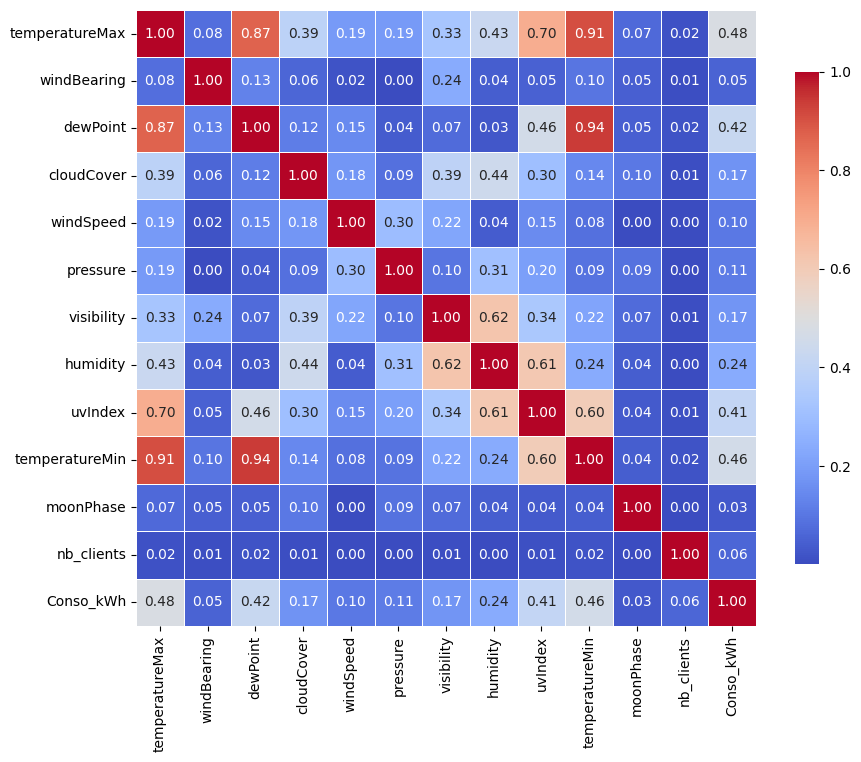

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True).abs(), 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5, 
            cbar_kws={"shrink": .8})
plt.show()

In [215]:
df['is_holiday'] = df['Date'].dt.date.isin(holidays.dt.date)

In [216]:
df["dayofweek"] = df["Date"].dt.dayofweek
df["month"]     = df["Date"].dt.month
df["dayofyear"] = df["Date"].dt.dayofyear

In [217]:
df.to_parquet(r'..\data\01_interim\daily_data_processed.parquet')